# **Student Performance Analysis with K-Means Clustering**

In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd  # For data manipulation
import numpy as np    # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced visualizations
import warnings        # To handle warning messages
warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output

In [2]:
# Load the student performance dataset from a CSV file (online)
df = pd.read_csv("https://raw.githubusercontent.com/iamnaveen1401/Datasets/refs/heads/main/student_performance.csv")
df.head()  # Show the first few rows of the data

,StudyHours,Attendance,Resources,Extracurricular,Motivation,Internet,Gender,Age,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade
0,19,64,1,0,0,1,0,19,2,8,1,59,40,0,1,3
1,19,64,1,0,0,1,0,23,3,16,0,90,66,0,1,2
2,19,64,1,0,0,1,0,28,1,19,0,67,99,1,1,0
3,19,64,1,1,0,1,0,19,2,8,1,59,40,0,1,3
4,19,64,1,1,0,1,0,23,3,16,0,90,66,0,1,2


In [3]:
# Print unique values for each column to understand the data types and categories
for i in df.columns:
    print(f"{i} : {df[i].unique()}")

StudyHours : [19 24 29 25 17 23 21  9 10 22 15 12 20 11 13 16 18 31 14  8 26 28 35 27
 36 43 33 30  7 32  6 38  5 34 39 37 44]
Attendance : [ 64  98  89  92  84  78  94  80  97  83  82  68  70  75  99  74  65  62
  91  90  66  69  60  72  61  86  77  71  67  88  87  73  96  81  95  63
  79 100  85  76  93]
Resources : [1 0 2]
Extracurricular : [0 1]
Motivation : [0 1 2]
Internet : [1 0]
Gender : [0 1]
Age : [19 23 28 29 27 25 20 26 21 18 24 22]
LearningStyle : [2 3 1 0]
OnlineCourses : [ 8 16 19  3  0  5 17  4  1 12 10 14 13 11  7  9 20  2 15 18  6]
Discussions : [1 0]
AssignmentCompletion : [ 59  90  67  65  71  61  75  96  63  86  57  74  91 100  68  64  73  70
  66  77  55  85  87  88  50  56  93  80  69  62  79  98  89  52  82  54
  99  58  51  78  83  94  53  84  60  92  76  95  72  97  81]
ExamScore : [ 40  66  99  46  83  95  54  42  62  94  48  60  58  92  93  73  69  87
  88  78  82  86  96  68  64  49  56  89  75  71  91  97  67  65  77  90
  98  72  63 100  61  52  79  51  5

In [4]:
# Show info about the DataFrame: columns, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14003 entries, 0 to 14002
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   StudyHours            14003 non-null  int64
 1   Attendance            14003 non-null  int64
 2   Resources             14003 non-null  int64
 3   Extracurricular       14003 non-null  int64
 4   Motivation            14003 non-null  int64
 5   Internet              14003 non-null  int64
 6   Gender                14003 non-null  int64
 7   Age                   14003 non-null  int64
 8   LearningStyle         14003 non-null  int64
 9   OnlineCourses         14003 non-null  int64
 10  Discussions           14003 non-null  int64
 11  AssignmentCompletion  14003 non-null  int64
 12  ExamScore             14003 non-null  int64
 13  EduTech               14003 non-null  int64
 14  StressLevel           14003 non-null  int64
 15  FinalGrade            14003 non-null  int64
dtypes: i

In [5]:
# Show summary statistics for all columns (mean, std, min, max, etc.)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
StudyHours,14003.0,19.987431,5.890637,5.0,16.0,20.0,24.0,44.0
Attendance,14003.0,80.194316,11.472181,60.0,70.0,80.0,90.0,100.0
Resources,14003.0,1.104406,0.697362,0.0,1.0,1.0,2.0,2.0
Extracurricular,14003.0,0.594158,0.491072,0.0,0.0,1.0,1.0,1.0
Motivation,14003.0,0.905806,0.695896,0.0,0.0,1.0,1.0,2.0
Internet,14003.0,0.925516,0.262566,0.0,1.0,1.0,1.0,1.0
Gender,14003.0,0.551953,0.497311,0.0,0.0,1.0,1.0,1.0
Age,14003.0,23.532172,3.514293,18.0,20.0,24.0,27.0,29.0
LearningStyle,14003.0,1.515461,1.112941,0.0,1.0,2.0,3.0,3.0
OnlineCourses,14003.0,9.891952,6.112801,0.0,5.0,10.0,15.0,20.0


<Axes: >

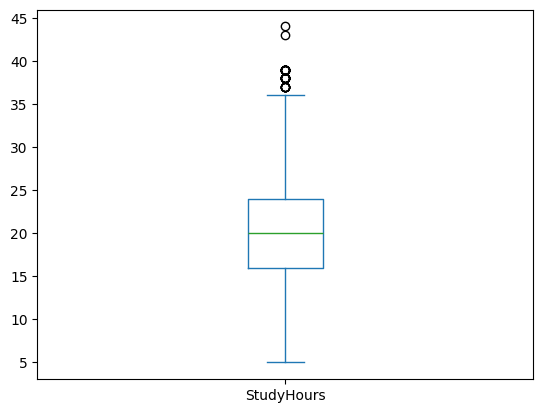

In [6]:
# Draw a box plot to visualize the distribution and outliers for StudyHours
df['StudyHours'].plot(kind='box')

<Axes: ylabel='Density'>

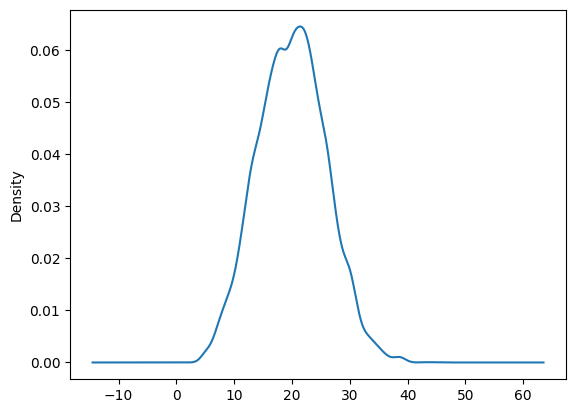

In [7]:
# Plot the distribution of StudyHours using a KDE (smooth curve)
df['StudyHours'].plot(kind='kde')

In [8]:
df.isna().sum()

StudyHours              0
Attendance              0
Resources               0
Extracurricular         0
Motivation              0
Internet                0
Gender                  0
Age                     0
LearningStyle           0
OnlineCourses           0
Discussions             0
AssignmentCompletion    0
ExamScore               0
EduTech                 0
StressLevel             0
FinalGrade              0
dtype: int64

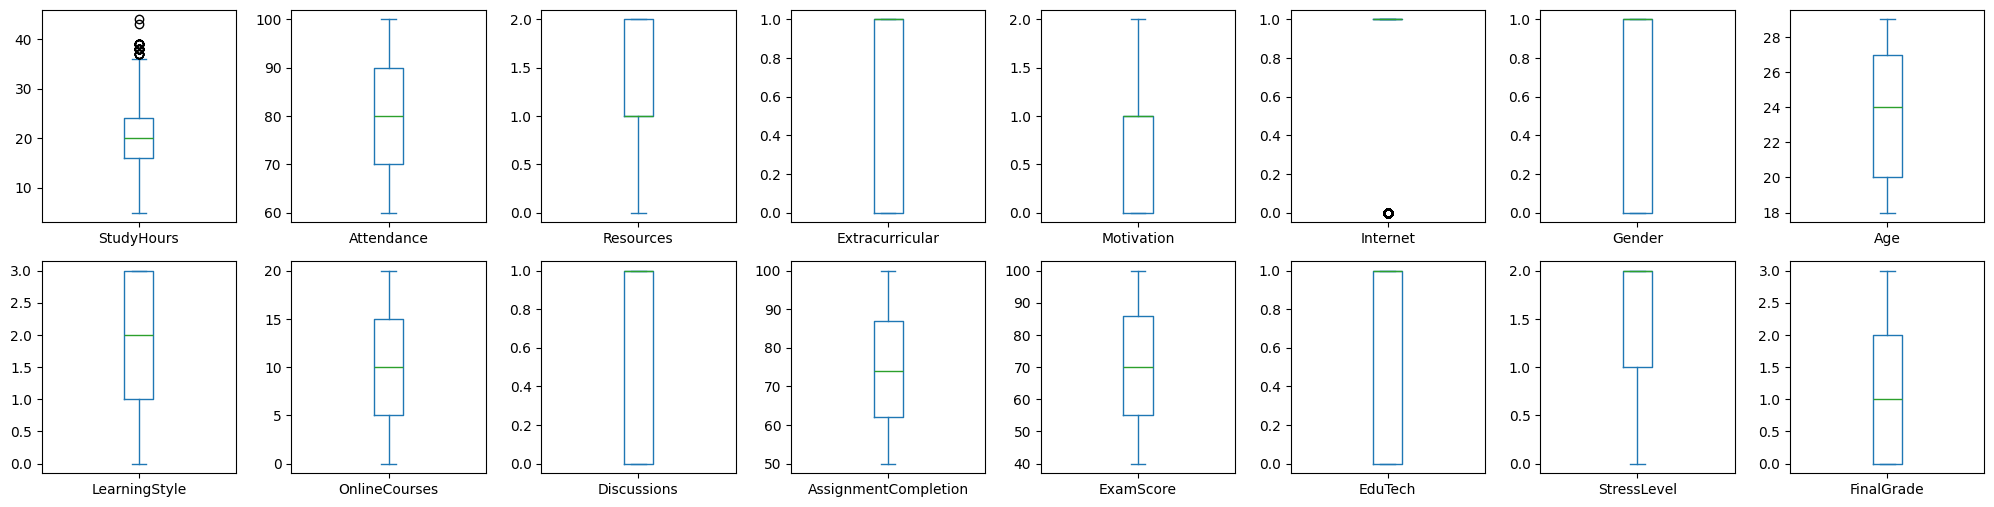

In [9]:
df.plot(kind='box', subplots=True, layout=(8, 8), figsize=(20, 20), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


In [10]:
df['Internet'].value_counts()

Internet
1    12960
0     1043
Name: count, dtype: int64

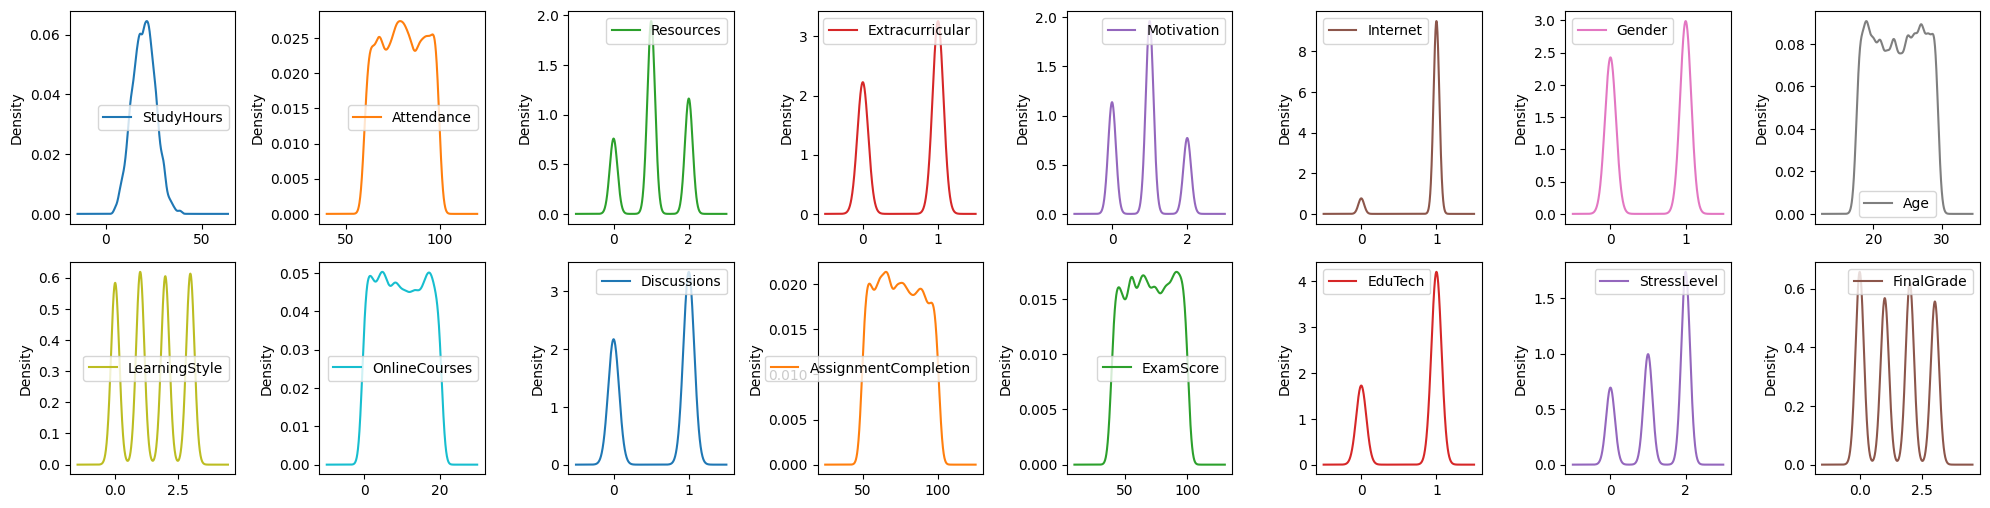

In [11]:
df.plot(kind='kde', subplots=True, layout=(8, 8), figsize=(20, 20), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


In [12]:
X = df.copy()

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k_values = range(2,11)
wcss = []
sil_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    K_Mean = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled,K_Mean)
    sil_scores.append(sil_score)
    wcss.append(kmeans.inertia_)
    

In [15]:
wcss

[202242.7852684328,
 195040.3509499,
 188936.59228524976,
 178580.37343127458,
 174534.06695005263,
 170271.09379554418,
 166465.1648202595,
 163154.67121850402,
 160380.3602101645]

In [16]:
sil_scores

[np.float64(0.09413372876665844),
 np.float64(0.07039710787015972),
 np.float64(0.06500275098338504),
 np.float64(0.07001241449538947),
 np.float64(0.06179378375492106),
 np.float64(0.05998679568298276),
 np.float64(0.05903973157050051),
 np.float64(0.06315350329789074),
 np.float64(0.0627004642814752)]

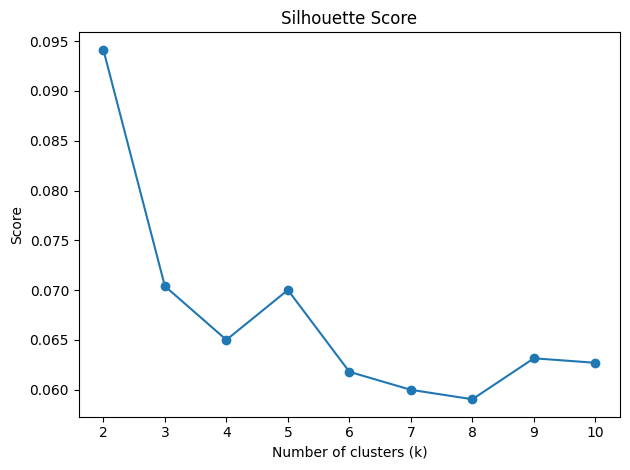

In [17]:

# Silhouette Scores

plt.plot(k_values, sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


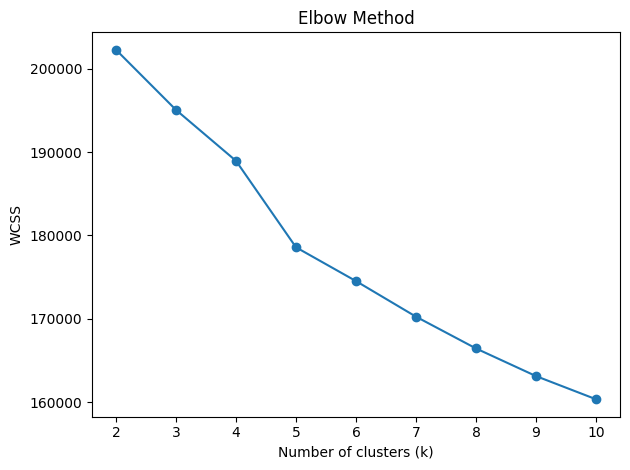

In [18]:

# Elbow Method

plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')

plt.tight_layout()
plt.show()


In [19]:
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k, init = 'k-means++')
df['Cluster'] = kmeans.fit_predict(X_scaled)  # add o|p col
df.head()

,StudyHours,Attendance,Resources,Extracurricular,Motivation,Internet,Gender,Age,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade,Cluster
0,19,64,1,0,0,1,0,19,2,8,1,59,40,0,1,3,0
1,19,64,1,0,0,1,0,23,3,16,0,90,66,0,1,2,1
2,19,64,1,0,0,1,0,28,1,19,0,67,99,1,1,0,1
3,19,64,1,1,0,1,0,19,2,8,1,59,40,0,1,3,0
4,19,64,1,1,0,1,0,23,3,16,0,90,66,0,1,2,0


In [20]:
df['Cluster'].value_counts()

Cluster
0    5710
1    3183
2    2633
3    2477
Name: count, dtype: int64

In [21]:
X_scaled = pd.DataFrame(X_scaled,columns=X.columns )
X_scaled

,StudyHours,Attendance,Resources,Extracurricular,Motivation,Internet,Gender,Age,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade
0,-0.167633,-1.411667,-0.149721,-1.209965,-1.301687,0.283687,-1.109914,-1.289686,0.435384,-0.309518,0.806547,-1.059520,-1.715729,-1.561141,-0.387549,1.383935
1,-0.167633,-1.411667,-0.149721,-1.209965,-1.301687,0.283687,-1.109914,-0.151436,1.333936,0.999258,-1.239853,1.059174,-0.245763,-1.561141,-0.387549,0.492279
2,-0.167633,-1.411667,-0.149721,-1.209965,-1.301687,0.283687,-1.109914,1.271376,-0.463169,1.490049,-1.239853,-0.512761,1.619963,0.640557,-0.387549,-1.291031
3,-0.167633,-1.411667,-0.149721,0.826470,-1.301687,0.283687,-1.109914,-1.289686,0.435384,-0.309518,0.806547,-1.059520,-1.715729,-1.561141,-0.387549,1.383935
4,-0.167633,-1.411667,-0.149721,0.826470,-1.301687,0.283687,-1.109914,-0.151436,1.333936,0.999258,-1.239853,1.059174,-0.245763,-1.561141,-0.387549,0.492279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13998,1.699804,-1.586008,-1.583749,0.826470,0.135361,0.283687,-1.109914,-0.435998,0.435384,-1.291099,0.806547,1.742623,0.036923,0.640557,0.885761,-0.399376
13999,1.699804,-1.586008,-1.583749,0.826470,0.135361,0.283687,-1.109914,-0.151436,1.333936,0.344870,0.806547,-0.171036,-0.867672,0.640557,-0.387549,0.492279
14000,0.341668,0.854766,1.284306,-1.209965,0.135361,0.283687,-1.109914,-0.151436,1.333936,-1.618293,0.806547,0.375724,-0.811134,-1.561141,-1.660858,0.492279
14001,0.341668,0.854766,1.284306,-1.209965,0.135361,0.283687,-1.109914,1.555939,0.435384,0.999258,-1.239853,-1.674625,-0.471911,0.640557,0.885761,0.492279


In [22]:
X_scaled.columns

Index(['StudyHours', 'Attendance', 'Resources', 'Extracurricular',
       'Motivation', 'Internet', 'Gender', 'Age', 'LearningStyle',
       'OnlineCourses', 'Discussions', 'AssignmentCompletion', 'ExamScore',
       'EduTech', 'StressLevel', 'FinalGrade'],
      dtype='object')

In [23]:
X_scaled = X_scaled.drop(['Gender', 'Age','Extracurricular'], axis = 1)

In [24]:
X_scaled

,StudyHours,Attendance,Resources,Motivation,Internet,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade
0,-0.167633,-1.411667,-0.149721,-1.301687,0.283687,0.435384,-0.309518,0.806547,-1.059520,-1.715729,-1.561141,-0.387549,1.383935
1,-0.167633,-1.411667,-0.149721,-1.301687,0.283687,1.333936,0.999258,-1.239853,1.059174,-0.245763,-1.561141,-0.387549,0.492279
2,-0.167633,-1.411667,-0.149721,-1.301687,0.283687,-0.463169,1.490049,-1.239853,-0.512761,1.619963,0.640557,-0.387549,-1.291031
3,-0.167633,-1.411667,-0.149721,-1.301687,0.283687,0.435384,-0.309518,0.806547,-1.059520,-1.715729,-1.561141,-0.387549,1.383935
4,-0.167633,-1.411667,-0.149721,-1.301687,0.283687,1.333936,0.999258,-1.239853,1.059174,-0.245763,-1.561141,-0.387549,0.492279
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13998,1.699804,-1.586008,-1.583749,0.135361,0.283687,0.435384,-1.291099,0.806547,1.742623,0.036923,0.640557,0.885761,-0.399376
13999,1.699804,-1.586008,-1.583749,0.135361,0.283687,1.333936,0.344870,0.806547,-0.171036,-0.867672,0.640557,-0.387549,0.492279
14000,0.341668,0.854766,1.284306,0.135361,0.283687,1.333936,-1.618293,0.806547,0.375724,-0.811134,-1.561141,-1.660858,0.492279
14001,0.341668,0.854766,1.284306,0.135361,0.283687,0.435384,0.999258,-1.239853,-1.674625,-0.471911,0.640557,0.885761,0.492279


In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k_values = range(2,11)
wcss = []
sil_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    K_Mean = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled,K_Mean)
    sil_scores.append(sil_score)
    wcss.append(kmeans.inertia_)

In [26]:
wcss

[160242.53957320526,
 152286.83149635157,
 147367.62125258645,
 136731.73000180488,
 140596.85898614555,
 128049.87388949792,
 133720.14338638214,
 129654.18345098442,
 120398.68888428909]

In [27]:
sil_scores

[np.float64(0.11580212514523303),
 np.float64(0.09895715353802824),
 np.float64(0.07981338953229292),
 np.float64(0.08273977269341726),
 np.float64(0.059535703182084176),
 np.float64(0.0836930239551374),
 np.float64(0.06346329061378045),
 np.float64(0.0678137293331835),
 np.float64(0.07947543990997874)]

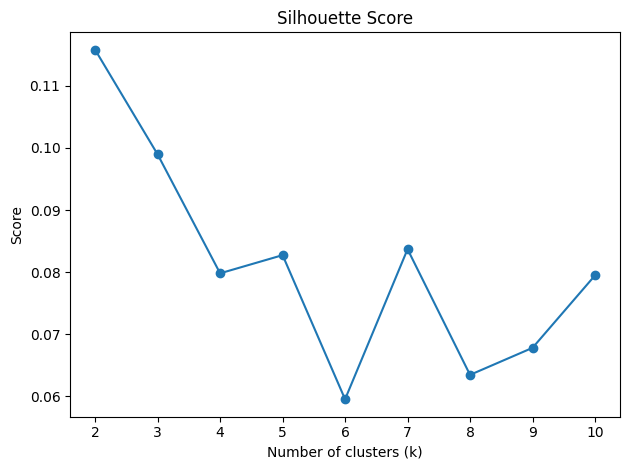

In [28]:

# Silhouette Scores

plt.plot(k_values, sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


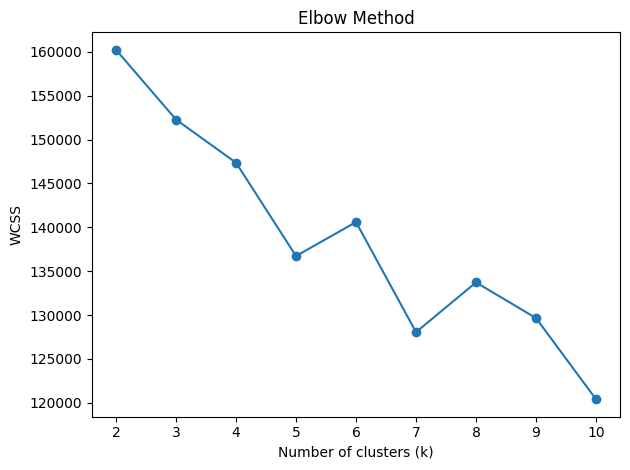

In [29]:

# Elbow Method

plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')

plt.tight_layout()
plt.show()


In [30]:
from sklearn.cluster import KMeans
k = 6
kmeans = KMeans(n_clusters=k, init = 'k-means++')
kmeans_score = kmeans.fit_predict(X)
df['Cluster'] = kmeans.fit_predict(X_scaled)  # add o|p col
df.head()

,StudyHours,Attendance,Resources,Extracurricular,Motivation,Internet,Gender,Age,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade,Cluster
0,19,64,1,0,0,1,0,19,2,8,1,59,40,0,1,3,4
1,19,64,1,0,0,1,0,23,3,16,0,90,66,0,1,2,4
2,19,64,1,0,0,1,0,28,1,19,0,67,99,1,1,0,3
3,19,64,1,1,0,1,0,19,2,8,1,59,40,0,1,3,4
4,19,64,1,1,0,1,0,23,3,16,0,90,66,0,1,2,4


In [31]:
from sklearn.metrics import silhouette_score
silhouette_score(X,kmeans_score)

np.float64(0.212947774389186)

**Conclusion:** Student Performance Clustering Results

- The K-Means clustering algorithm was applied to the student performance dataset to group students based on similar characteristics and study habits.
- The optimal number of clusters was determined using the Elbow Method and Silhouette Score, which help identify the best separation between groups.
- After clustering, each student was assigned to a group (cluster) that shares similar performance patterns.
- The Silhouette Score in the last cell measures how well each student fits within their assigned cluster. A higher score means students in the same cluster are more alike, and clusters are well separated.
- These clusters can help educators and administrators:

  - Identify groups of students who may need extra support or resources.
  - Recognize high-performing groups and their common traits.
  - Tailor interventions and teaching strategies to specific student groups.
- In summary, clustering provides valuable insights into student performance, allowing for more personalized and effective educational approaches.